In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
#for presenting maximum columns
pd.set_option('display.max_columns',None)

In [240]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [241]:
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,02-01-2015,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,13-01-2015,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,?,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0,0,27-02-2015,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,?,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,FEMALE,PhD,other-service,golf,own-child,0,0,30-01-2015,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,4872 Rock Ridge,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,MALE,PhD,priv-house-serv,camping,wife,0,-39300,05-01-2015,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,3066 Francis Ave,14,1,NO,2,1,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [124]:
df.shape

(1000, 40)

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

# EDA

checking for duplicate data

In [243]:
df.duplicated().sum()

0

# Checking unwanted columns

In [244]:
df.nunique().sort_values(ascending=False)

policy_number                  1000
incident_location              1000
insured_zip                     995
policy_annual_premium           991
policy_bind_date                951
total_claim_amount              763
vehicle_claim                   726
injury_claim                    638
property_claim                  626
months_as_customer              391
capital-loss                    354
capital-gains                   338
incident_date                    60
age                              46
auto_model                       39
incident_hour_of_the_day         24
auto_year                        21
insured_hobbies                  20
auto_make                        14
insured_occupation               14
umbrella_limit                   11
insured_education_level           7
incident_state                    7
incident_city                     7
insured_relationship              6
authorities_contacted             5
witnesses                         4
incident_severity           

In [245]:
print(df['_c39'].unique())

[nan]


Here we can see that Policy_numbers is having all unique values and c39 are having only one Nan value hence we will drop this column.

also can see that Incident Location and Zip code is having almost all unique value hence instead of deleting we will handle in PCA to get into some column information

# Dropping Unwanted columns ;

In [246]:
df.drop(columns='_c39',axis=1,inplace=True)

In [247]:
df.drop(columns='policy_number',axis=1,inplace=True)

# Checking ISNULL Data

In [248]:
df.isnull().sum().sum()

0

can see there is no NULL data present.

<AxesSubplot:>

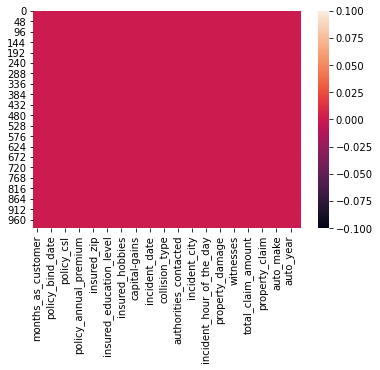

In [249]:
sns.heatmap(df.isnull())

# Checking Data type

In [250]:
df.dtypes.sort_values(ascending=False)

incident_severity               object
insured_relationship            object
auto_model                      object
auto_make                       object
police_report_available         object
property_damage                 object
incident_location               object
incident_city                   object
incident_state                  object
authorities_contacted           object
collision_type                  object
incident_type                   object
incident_date                   object
fraud_reported                  object
policy_csl                      object
insured_hobbies                 object
insured_occupation              object
insured_education_level         object
insured_sex                     object
policy_bind_date                object
policy_state                    object
policy_annual_premium          float64
capital-gains                    int64
auto_year                        int64
vehicle_claim                    int64
property_claim           

as we can see we have many columns which are in object format hene we willc onvert the data into numeric so model can predict well

# Checking Distinct Data in columns

we will check for columns which is having object as data type

N    753
Y    247
Name: fraud_reported, dtype: int64


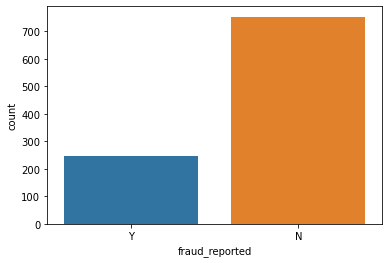

In [251]:
import seaborn as sns
ax=sns.countplot(x="fraud_reported",data=df)
print(df["fraud_reported"].value_counts())

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


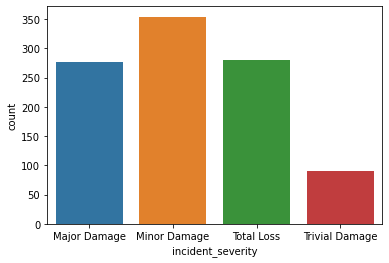

In [252]:
import seaborn as sns
ax=sns.countplot(x="incident_severity",data=df)
print(df["incident_severity"].value_counts())

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


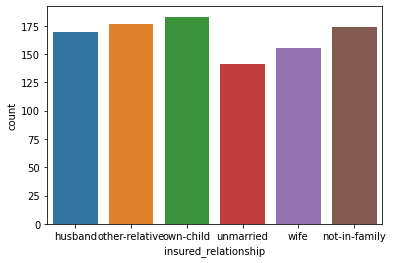

In [253]:
import seaborn as sns
ax=sns.countplot(x="insured_relationship",data=df)
print(df["insured_relationship"].value_counts())

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Tahoe             24
Escape            24
Maxima            24
Ultima            23
X5                23
Silverado         22
Highlander        22
Civic             22
Fusion            21
CRV               20
Corolla           20
Impreza           20
TL                20
ML350             20
3 Series          18
C300              18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64


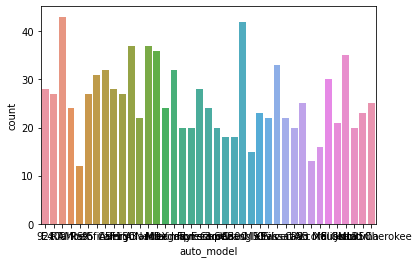

In [254]:
import seaborn as sns
ax=sns.countplot(x="auto_model",data=df)
print(df["auto_model"].value_counts())

Suburu        80
Saab          80
Dodge         80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


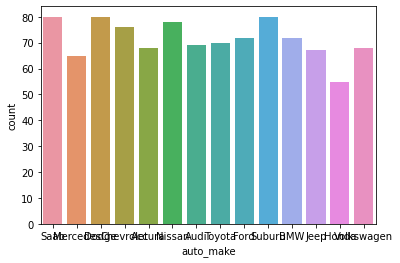

In [255]:
import seaborn as sns
ax=sns.countplot(x="auto_make",data=df)
print(df["auto_make"].value_counts())

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64


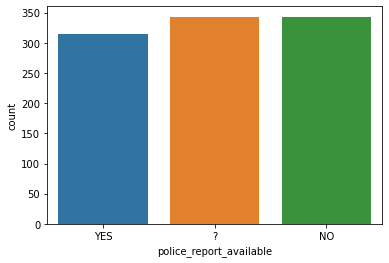

In [256]:
import seaborn as sns
ax=sns.countplot(x="police_report_available",data=df)
print(df["police_report_available"].value_counts())

?      360
NO     338
YES    302
Name: property_damage, dtype: int64


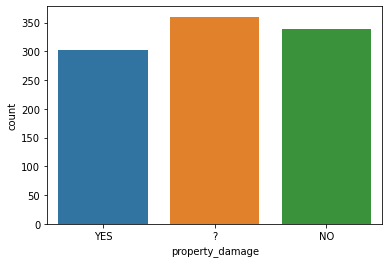

In [257]:
import seaborn as sns
ax=sns.countplot(x="property_damage",data=df)
print(df["property_damage"].value_counts())

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


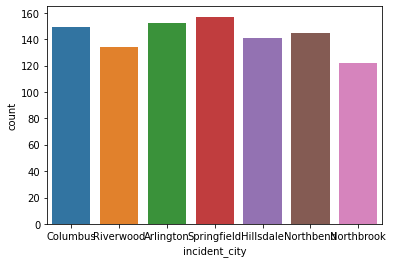

In [259]:
import seaborn as sns
ax=sns.countplot(x="incident_city",data=df)
print(df["incident_city"].value_counts())

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


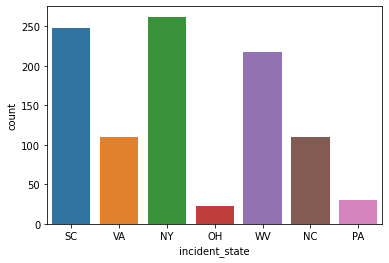

In [260]:
import seaborn as sns
ax=sns.countplot(x="incident_state",data=df)
print(df["incident_state"].value_counts())

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


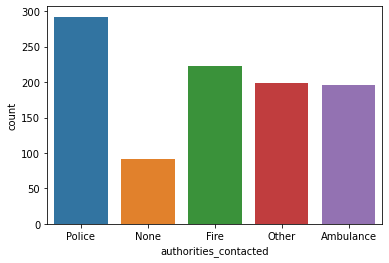

In [261]:
import seaborn as sns
ax=sns.countplot(x="authorities_contacted",data=df)
print(df["authorities_contacted"].value_counts())

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64


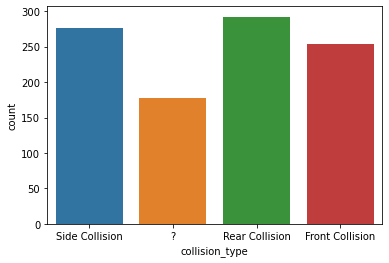

In [262]:
import seaborn as sns
ax=sns.countplot(x="collision_type",data=df)
print(df["collision_type"].value_counts())

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


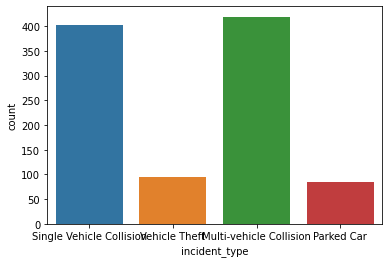

In [263]:
import seaborn as sns
ax=sns.countplot(x="incident_type",data=df)
print(df["incident_type"].value_counts())

02-02-2015    28
17-02-2015    26
07-01-2015    25
10-01-2015    24
04-02-2015    24
24-01-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
22-02-2015    20
31-01-2015    20
06-02-2015    20
12-02-2015    20
01-01-2015    19
14-01-2015    19
21-01-2015    19
21-02-2015    19
12-01-2015    19
23-02-2015    19
14-02-2015    18
01-02-2015    18
03-01-2015    18
20-01-2015    18
28-02-2015    18
25-02-2015    18
18-01-2015    18
09-01-2015    17
26-02-2015    17
08-02-2015    17
24-02-2015    17
06-01-2015    17
16-02-2015    16
05-02-2015    16
13-02-2015    16
16-01-2015    16
15-02-2015    16
28-01-2015    15
18-02-2015    15
17-01-2015    15
15-01-2015    15
20-02-2015    14
22-01-2015    14
27-02-2015    14
23-01-2015    13
27-01-2015    13
03-02-2015    13
09-02-2015    13
04-01-2015    12
01-03-2015    12
29-01-2015    11
26-01-2015    11
02-01-2015    11
11-02-2015    10
07-02-2015    10
25-01-2015    10
10-02-2015    10
19-02-2015    10
11-01-2015    

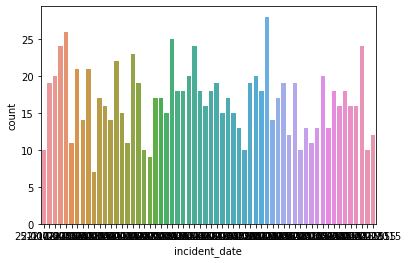

In [264]:
import seaborn as sns
ax=sns.countplot(x="incident_date",data=df)
print(df["incident_date"].value_counts())

N    753
Y    247
Name: fraud_reported, dtype: int64


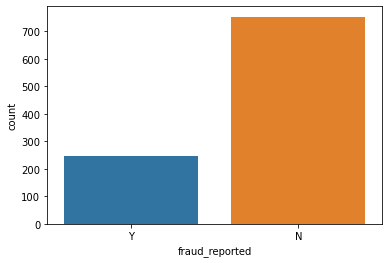

In [265]:
import seaborn as sns
ax=sns.countplot(x="fraud_reported",data=df)
print(df["fraud_reported"].value_counts())

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


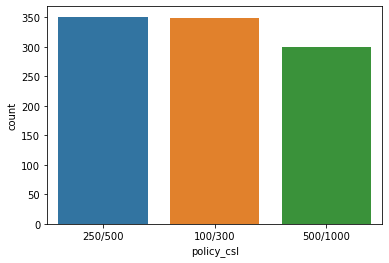

In [266]:
import seaborn as sns
ax=sns.countplot(x="policy_csl",data=df)
print(df["policy_csl"].value_counts())

reading           64
paintball         57
exercise          57
bungie-jumping    56
golf              55
movies            55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
base-jumping      49
skydiving         49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


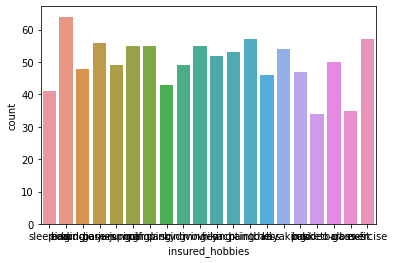

In [267]:
import seaborn as sns
ax=sns.countplot(x="insured_hobbies",data=df)
print(df["insured_hobbies"].value_counts())

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


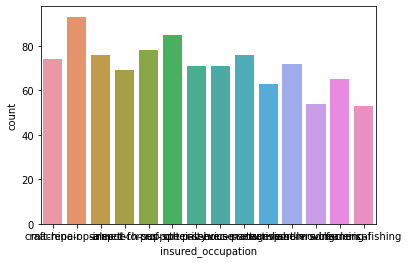

In [268]:
import seaborn as sns
ax=sns.countplot(x="insured_occupation",data=df)
print(df["insured_occupation"].value_counts())

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


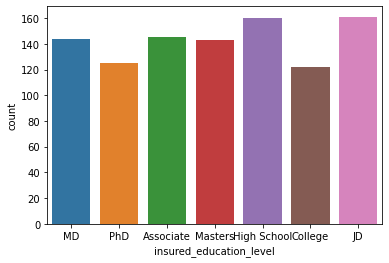

In [269]:
import seaborn as sns
ax=sns.countplot(x="insured_education_level",data=df)
print(df["insured_education_level"].value_counts())

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


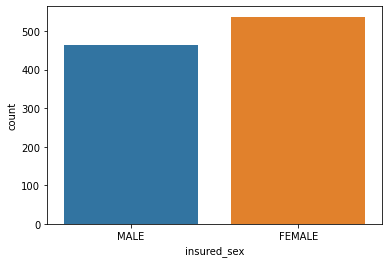

In [270]:
import seaborn as sns
ax=sns.countplot(x="insured_sex",data=df)
print(df["insured_sex"].value_counts())

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


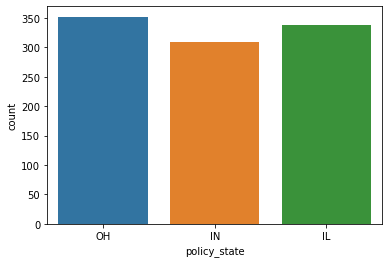

In [272]:
import seaborn as sns
ax=sns.countplot(x="policy_state",data=df)
print(df["policy_state"].value_counts())

# Data conversion using Label encoder

In [134]:
from sklearn.preprocessing import LabelEncoder

In [135]:
#by using for loop here we encoded the object columns
le =LabelEncoder()

list1=['incident_severity','insured_relationship','auto_model','auto_make','police_report_available','property_damage','incident_location','incident_city','incident_state','authorities_contacted','collision_type','incident_type','incident_date','fraud_reported','policy_csl','insured_hobbies','insured_occupation','insured_education_level','insured_sex','policy_bind_date','policy_state',
]
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [136]:
df.head(10)

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,532,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,49,2,3,0,4,4,1,996,5,1,2,1,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,821,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,41,3,0,1,4,5,5,628,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,186,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,44,0,2,1,4,1,1,685,7,3,1,2,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,766,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,19,2,1,0,4,2,0,669,5,1,0,1,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,181,0,2,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,34,3,0,1,2,1,0,220,20,1,1,0,1,1,6500,1300,650,4550,0,31,2009,0
5,256,39,385,2,1,1000,1351.10,0,478456,0,6,12,3,4,0,0,3,0,2,0,1,4,0,891,19,3,1,0,2,1,64100,6410,6410,51280,10,3,2003,1
6,137,34,112,1,1,1000,1333.35,0,441716,1,6,9,2,0,0,-77000,25,0,1,1,4,1,6,539,0,3,0,0,0,0,78650,21450,7150,50050,9,29,2012,0
7,165,37,60,0,0,1000,1137.03,0,603195,1,0,12,0,4,0,0,54,0,1,2,4,5,1,276,23,3,0,2,2,2,51590,9380,9380,32830,1,5,2015,0
8,27,33,132,0,0,500,1442.99,0,601734,0,6,7,9,3,0,0,58,2,1,2,4,6,0,429,21,1,1,1,1,2,27700,2770,2770,22160,12,9,2012,0
9,212,42,772,0,0,500,1315.68,0,600983,1,6,8,4,5,0,-39300,9,2,2,2,3,0,2,224,14,1,1,2,1,0,42300,4700,4700,32900,10,1,1996,0


checking if all Columns are converted into Numeric or not

In [137]:
df.dtypes.sort_values(ascending=False)

policy_annual_premium          float64
months_as_customer               int64
property_claim                   int64
number_of_vehicles_involved      int64
age                              int64
bodily_injuries                  int64
witnesses                        int64
capital-loss                     int64
capital-gains                    int64
total_claim_amount               int64
injury_claim                     int64
vehicle_claim                    int64
insured_zip                      int64
umbrella_limit                   int64
policy_deductable                int64
auto_year                        int64
incident_hour_of_the_day         int64
incident_location                int32
police_report_available          int32
auto_make                        int32
property_damage                  int32
auto_model                       int32
incident_severity                int32
incident_city                    int32
incident_state                   int32
authorities_contacted    

# Describe Data

In [138]:
df.describe()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,474.332000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,2.966000,6.653000,9.731000,2.416000,25126.100000,-26793.700000,29.376000,1.172000,1.666000,1.184000,2.167000,3.242000,2.966000,499.500000,11.644000,1.83900,0.94200,0.992000,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,275.402851,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,1.948497,4.019048,5.674049,1.681003,27872.187708,28104.096686,17.249875,1.081474,1.063755,0.939695,1.532142,2.155942,2.044266,288.819436,6.951373,1.01888,0.81197,0.820127,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,0.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-111100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.00000,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,233.750000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,1.000000,3.000000,5.000000,1.000000,0.000000,-51500.000000,14.750000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,249.750000,6.000000,1.00000,0.00000,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,472.500000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,3.000000,7.000000,10.000000,2.000000,0.000000,-23250.000000,29.500000,1.000000,2.000000,1.000000,2.000000,4.000000,3.000000,499.500000,12.000000,1.00000,1.00000,1.000000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,713.250000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,5.000000,10.000000,15.000000,4.000000,51025.000000,0.000000,44.000000,2.000000,3.000000,2.000000,4.000000,5.000000,5.000000,749.250000,17.000000,3.00000,2.00000,2.000000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,950.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,6.000000,13.000000,19.000000,5.000000,100500.000000,0.000000,59.000000,3.000000,3.000000,3.000000,4.000000,6.000000,6.000000,999.000000,23.000000,4.00000,2.00000,2.000000,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


Observation : 
    
    1. Here we can see std dev is more than +-1 in many columns hence we can say skewness and outliers are present
    2. Comparison in Mean and 50% : we can see mean value is greater than 50% means skewness are present.
    3. Comparison in 75% and Max : we can see the diff is high within 75% and ma value hence we can say that outliers are present.

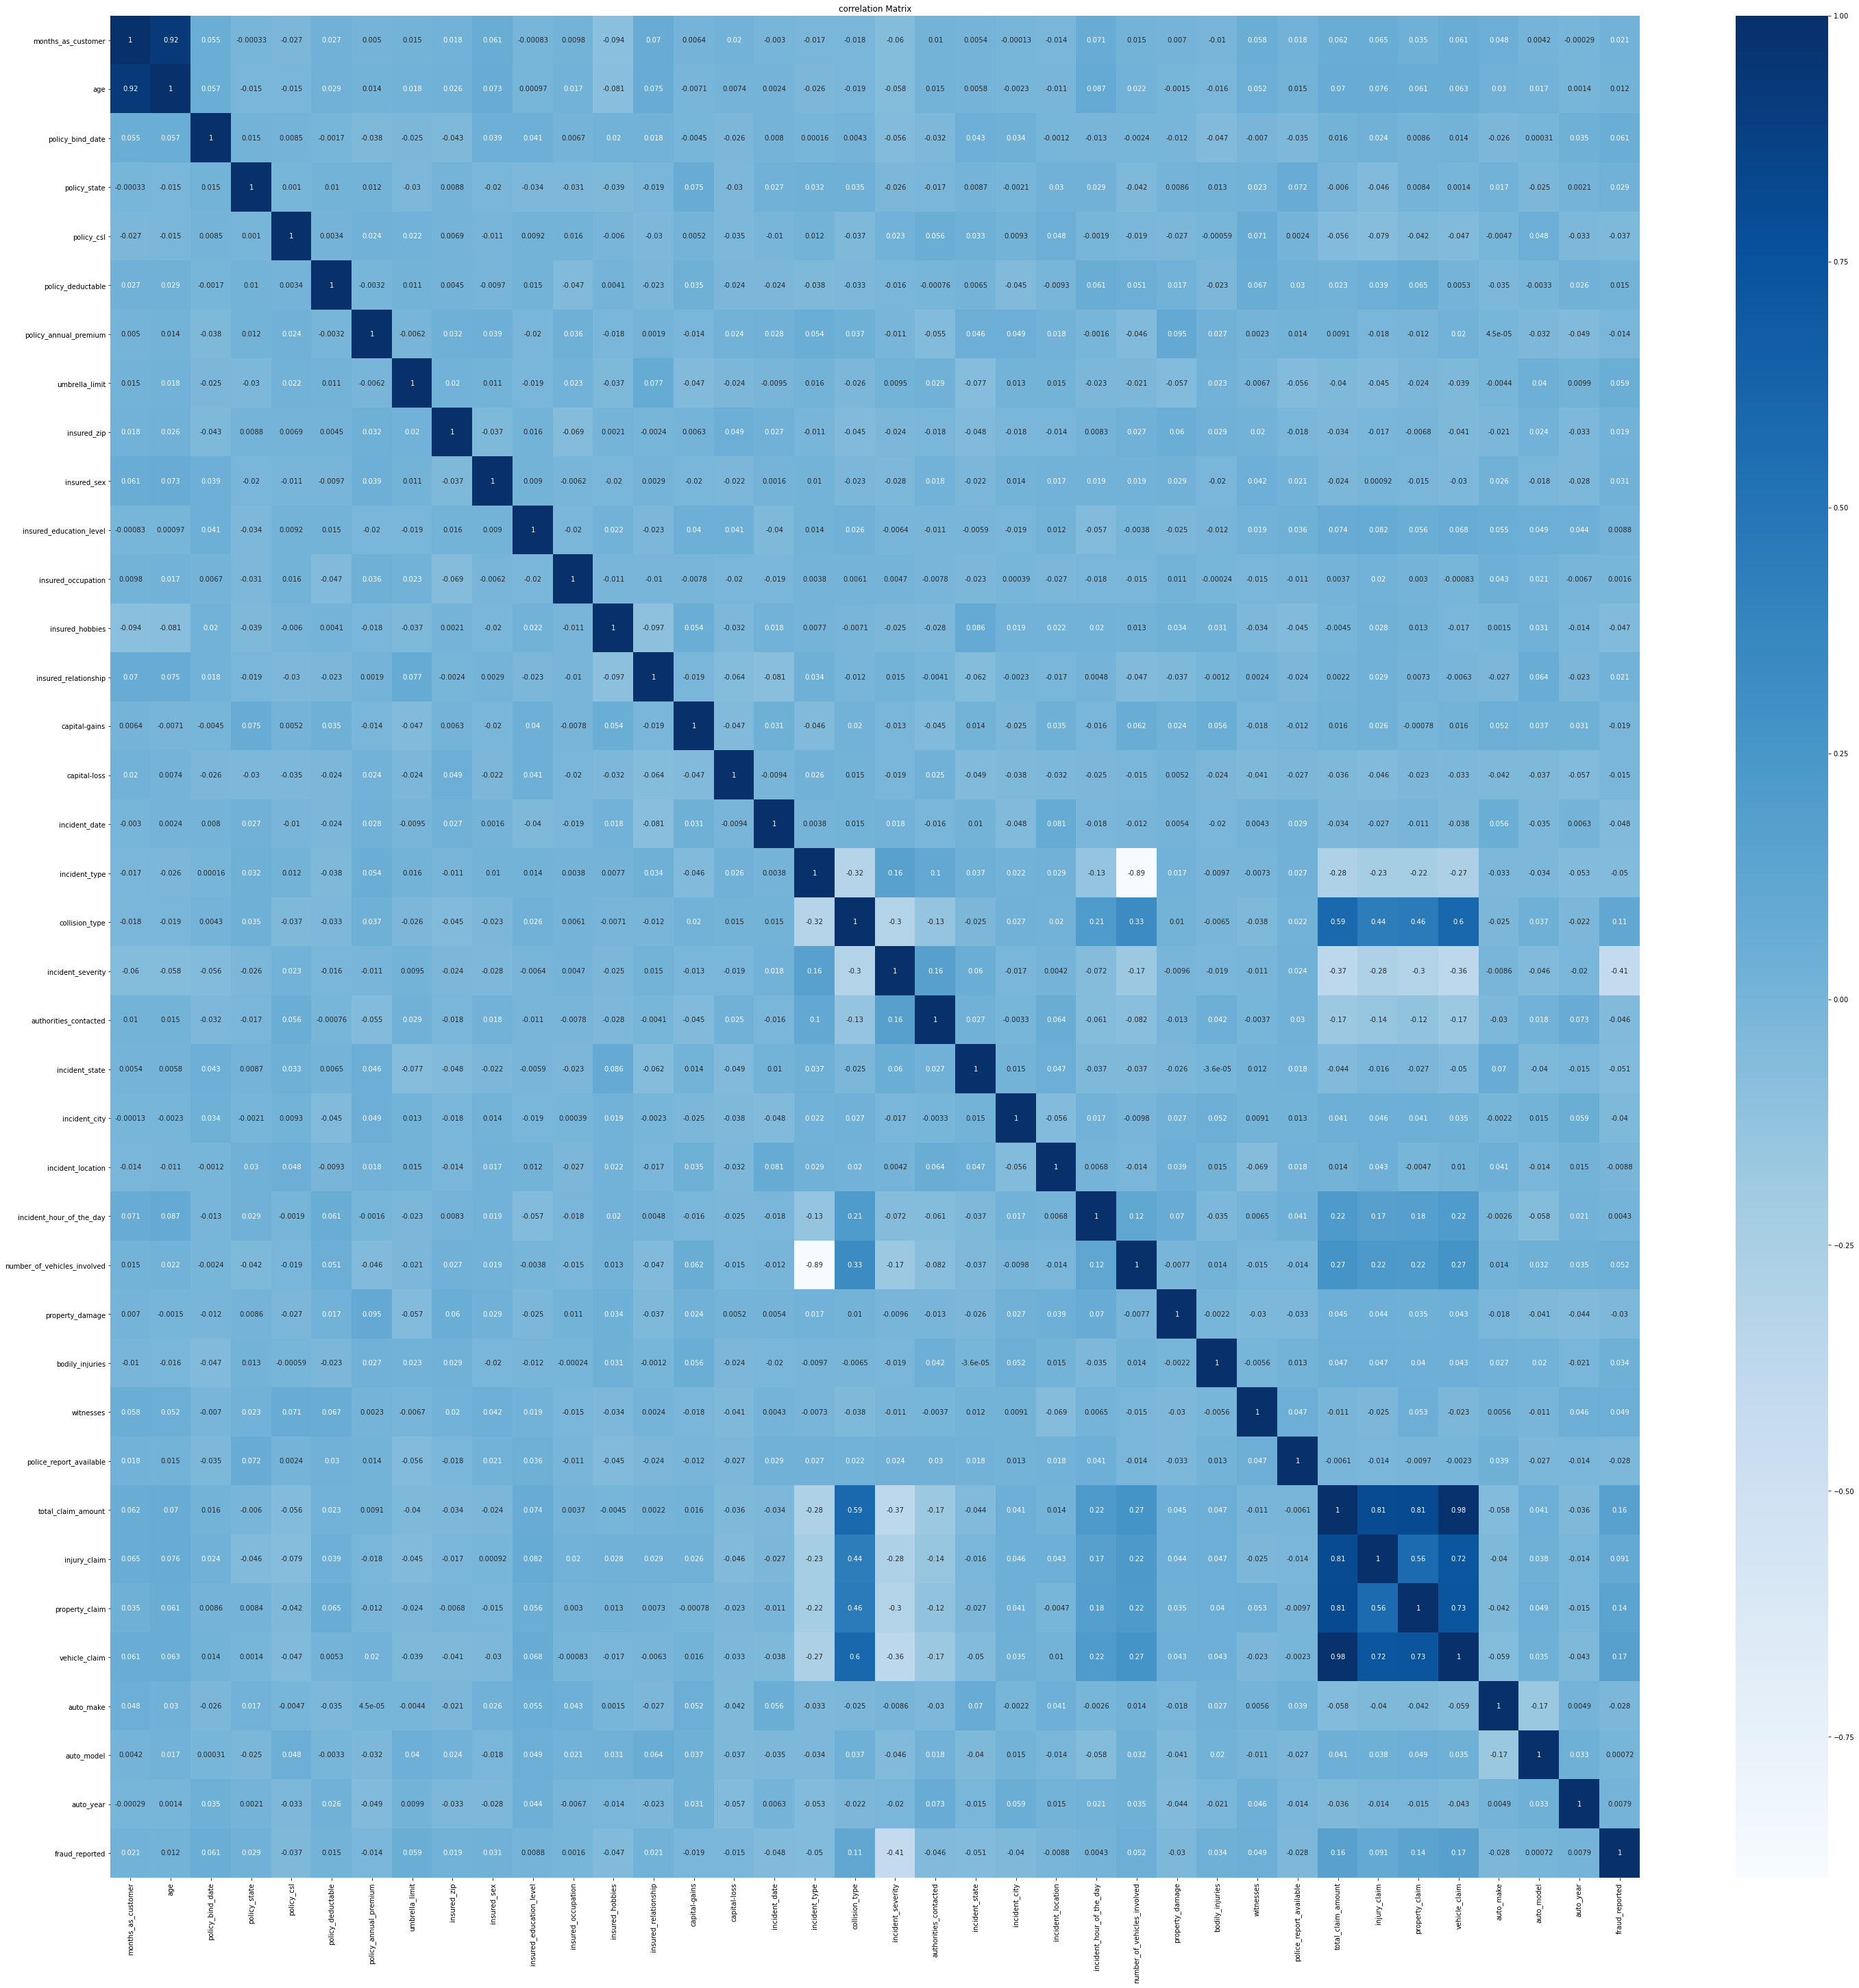

In [41]:
corr_mat=df.corr()#----------------> corelation function

plt.figure(figsize=[50,50])#-------> figure size dimetions
sns.heatmap(corr_mat,annot=True,cmap="Blues")#--> annot = true means will print values
plt.title("correlation Matrix")#---> title
plt.show()

the graph is huge but we can see that many columns are corelated with each other.

hence we can check with PCA or VIF where we can combine or removed corelated columns

# Checking Outliers 

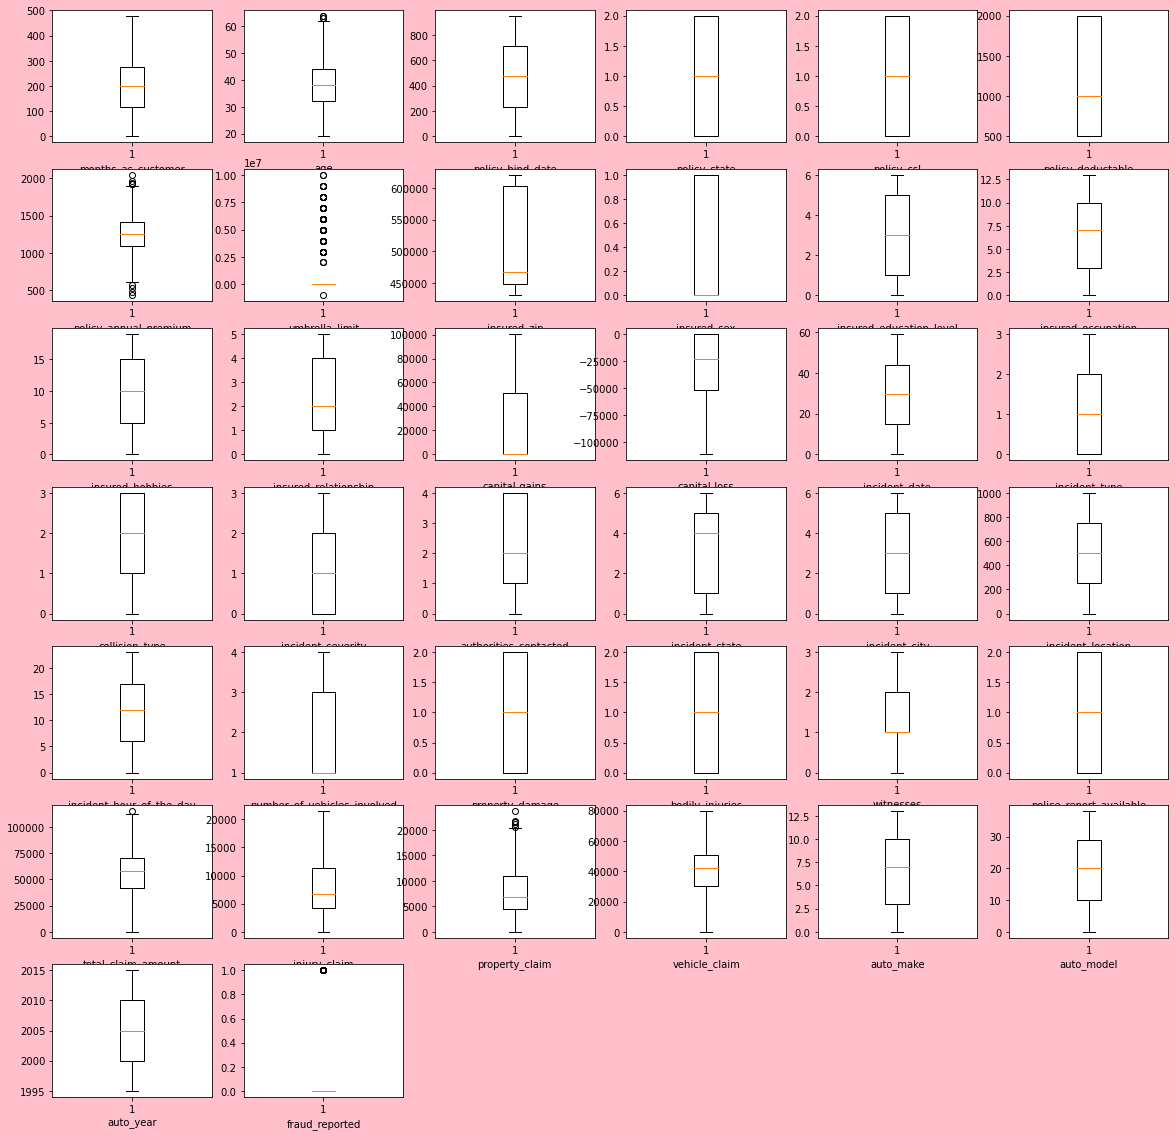

In [139]:
#checking one more time
plt.figure(figsize=(20,20),facecolor='pink')
plotnumber=1

for column in df:
    if plotnumber<=38:
        ax=plt.subplot(7,6,plotnumber)
        plt.boxplot(df[column])
        plt.xlabel(column)
        
    plotnumber+=1
plt.show()

we can see some of the columns are having outliers hence we will remove outliers using Z score method

# Removing Outliers

In [140]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.07813958, 0.99083647, 0.20949985, ..., 1.64574255, 0.1834404 ,
        1.74601919],
       [0.2089946 , 0.33407345, 1.25939678, ..., 0.65747047, 0.31549088,
        1.74601919],
       [0.60800168, 1.08891308, 1.04747018, ..., 0.95970204, 0.31549088,
        0.57273139],
       ...,
       [0.64276748, 0.54161057, 0.12594404, ..., 0.02857005, 1.5139238 ,
        0.57273139],
       [2.20802805, 2.52328351, 0.35844716, ..., 1.28637088, 1.18130295,
        0.57273139],
       [2.19064515, 2.3043625 , 0.41898517, ..., 0.65747047, 0.31549088,
        0.57273139]])

In [141]:
threshold=3
print(np.where(z>3))


(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 7,  7,  7,  7,  7,  6,  6,  7,  7,  7,  7, 32,  7,  7,  7,  6, 15,
        7,  7,  7], dtype=int64))


In [142]:
df_new=df[(z<3).all(axis=1)]
df_new

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,532,2,1,1000,1406.91,0,466132,1,4,2,17,0,53300,0,49,2,3,0,4,4,1,996,5,1,2,1,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,821,1,1,2000,1197.22,5000000,468176,1,4,6,15,2,0,0,41,3,0,1,4,5,5,628,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,186,2,0,2000,1413.14,5000000,430632,0,6,11,2,3,35100,0,44,0,2,1,4,1,1,685,7,3,1,2,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,766,0,1,2000,1415.74,6000000,608117,0,6,1,2,4,48900,-62400,19,2,1,0,4,2,0,669,5,1,0,1,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,181,0,2,1000,1583.91,6000000,610706,1,0,11,2,4,66000,-46000,34,3,0,1,2,1,0,220,20,1,1,0,1,1,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,487,2,2,1000,1310.80,0,431289,0,5,2,13,4,0,0,44,2,1,1,1,0,4,561,20,1,2,0,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,129,0,0,1000,1436.79,0,608177,0,6,9,17,5,70900,0,47,2,2,0,1,4,3,227,23,1,2,2,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,509,2,1,500,1383.49,3000000,442797,0,5,1,3,2,35100,0,45,0,3,1,4,0,0,746,4,3,0,2,3,2,67500,7500,7500,52500,11,19,1996,0
998,458,62,573,0,2,2000,1356.92,5000000,441714,1,0,5,0,5,0,0,52,2,2,0,3,1,0,569,2,1,0,0,1,2,46980,5220,5220,36540,1,5,1998,0


we can see almost 20 Rows are removed and also ideal approach is to use Z score only once.

# Seperation for Train and Test Data

In [143]:
X=df_new.drop('fraud_reported',axis=1) # all features
y=df_new.fraud_reported   

In [144]:
print(X.shape)
print(y.shape)

(980, 37)
(980,)


# Checking Skewness

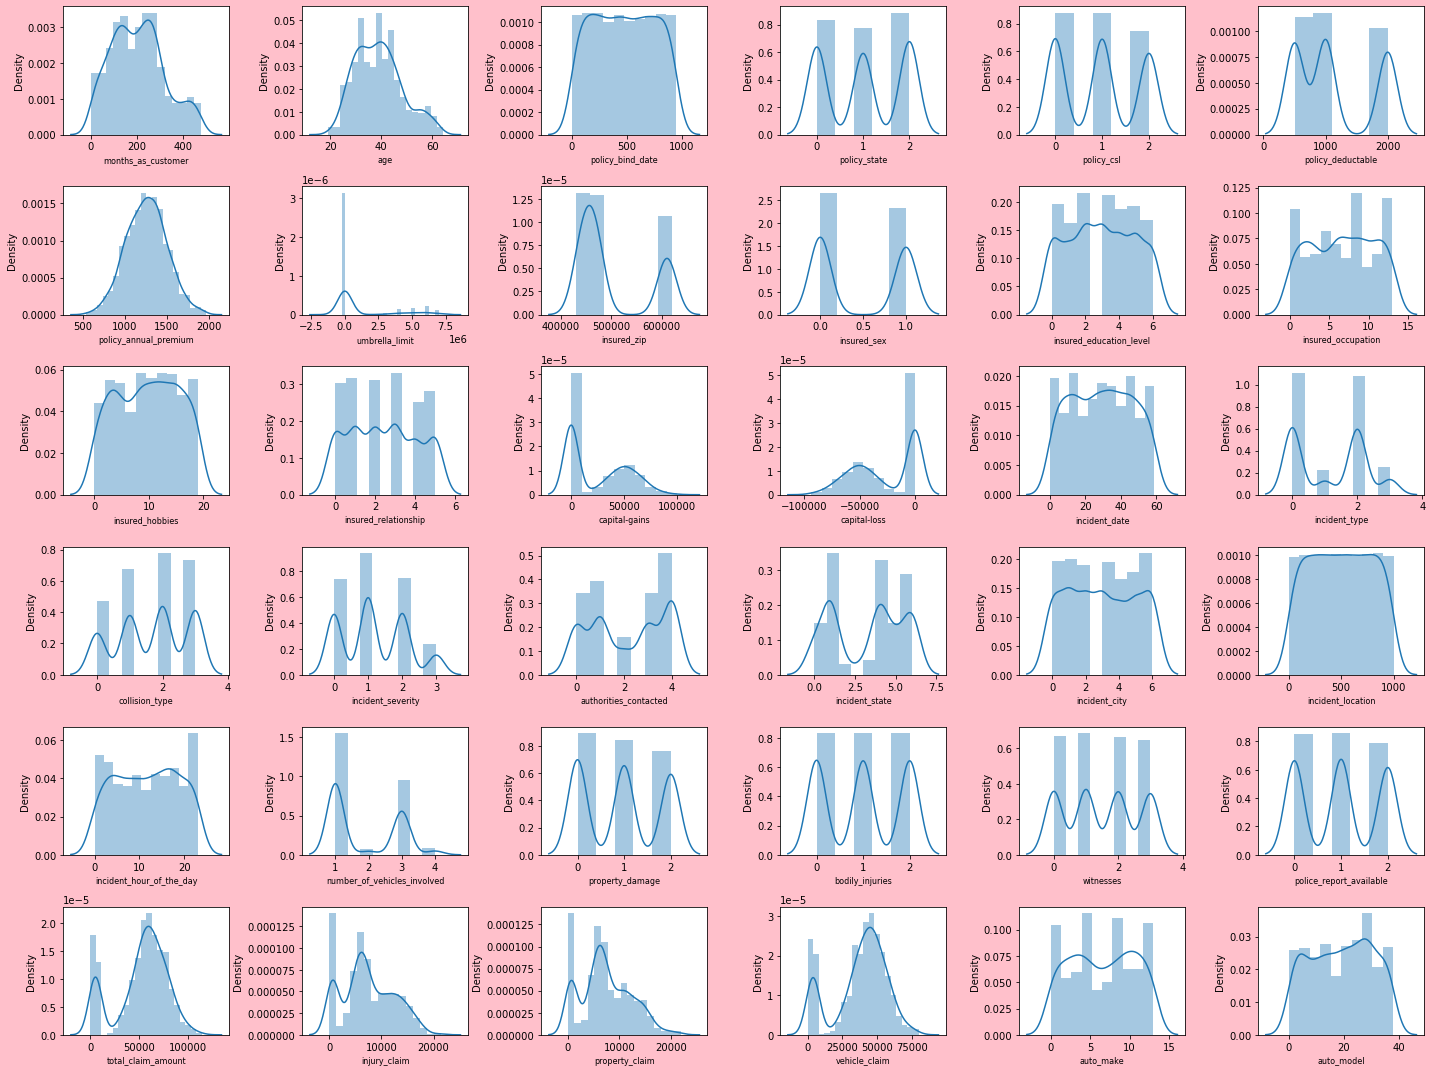

In [172]:
plt.figure(figsize=(20,15),facecolor='pink')
plotnumber=1

for column in df_new:
    if plotnumber<=36:
        ax = plt.subplot(6,6,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=8)
    
    
    plotnumber+=1
plt.tight_layout()

In [145]:
X.skew().sort_values(ascending=False)

umbrella_limit                 1.801424
insured_zip                    0.837283
number_of_vehicles_involved    0.509725
policy_deductable              0.476090
age                            0.475385
capital-gains                  0.466619
months_as_customer             0.362608
property_claim                 0.361356
incident_severity              0.277726
injury_claim                   0.271759
insured_sex                    0.139324
property_damage                0.101196
policy_csl                     0.098248
incident_type                  0.090563
insured_relationship           0.078339
police_report_available        0.044659
incident_city                  0.043882
policy_annual_premium          0.035964
witnesses                      0.026211
policy_bind_date               0.006386
insured_education_level        0.006286
bodily_injuries                0.003757
incident_date                  0.002604
incident_location             -0.003369
auto_make                     -0.028739


we can see many columns are more than +-0.5 hence we can use power transform method to remove skewness 

# Removing Skewness: Power Transform Method

In [146]:
from sklearn.preprocessing import power_transform

In [147]:
x_new=power_transform(X)

In [148]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)

25    0.372833
9     0.139324
15    0.088750
14    0.031294
5     0.022179
8     0.000000
1    -0.002183
6    -0.007258
36   -0.013973
19   -0.079569
26   -0.093063
17   -0.095572
4    -0.096814
29   -0.117961
27   -0.133824
0    -0.133972
3    -0.150765
28   -0.151669
13   -0.160168
22   -0.181833
10   -0.187642
18   -0.204055
20   -0.223816
34   -0.229846
11   -0.238129
12   -0.248575
21   -0.256064
24   -0.258027
16   -0.264010
35   -0.276099
23   -0.288690
2    -0.293677
32   -0.357397
31   -0.416732
30   -0.508540
33   -0.521805
7    -7.932397
dtype: float64

In [65]:
pd.DataFrame(x_new,columns=X.columns).skew().sort_values(ascending=False)

number_of_vehicles_involved    0.363693
insured_sex                    0.148630
capital-loss                   0.090488
capital-gains                  0.038722
policy_deductable              0.023988
policy_annual_premium          0.004758
insured_zip                    0.000000
age                           -0.001945
auto_year                     -0.012491
incident_severity             -0.079282
incident_type                 -0.088766
property_damage               -0.091082
policy_csl                    -0.100769
police_report_available       -0.114352
bodily_injuries               -0.128799
months_as_customer            -0.135661
policy_state                  -0.145377
witnesses                     -0.153648
insured_relationship          -0.160421
incident_city                 -0.181772
insured_education_level       -0.188564
collision_type                -0.204204
authorities_contacted         -0.227269
auto_make                     -0.227539
insured_occupation            -0.239336


In [149]:
x1=pd.DataFrame(x_new,columns=X.columns)

In [150]:
x1.skew().sort_values(ascending=False)

number_of_vehicles_involved    0.372833
insured_sex                    0.139324
capital-loss                   0.088750
capital-gains                  0.031294
policy_deductable              0.022179
insured_zip                    0.000000
age                           -0.002183
policy_annual_premium         -0.007258
auto_year                     -0.013973
incident_severity             -0.079569
property_damage               -0.093063
incident_type                 -0.095572
policy_csl                    -0.096814
police_report_available       -0.117961
bodily_injuries               -0.133824
months_as_customer            -0.133972
policy_state                  -0.150765
witnesses                     -0.151669
insured_relationship          -0.160168
incident_city                 -0.181833
insured_education_level       -0.187642
collision_type                -0.204055
authorities_contacted         -0.223816
auto_make                     -0.229846
insured_occupation            -0.238129


Umbrella Limit seems is still skewed

In [151]:
sk=x1.skew().sort_values(ascending=False)


In [152]:
sk[np.abs(sk)>0.5]

total_claim_amount   -0.508540
vehicle_claim        -0.521805
umbrella_limit       -7.932397
dtype: float64

# Use Sqrt Root method to remove Skewness

In [153]:
import numpy as np
x1['umbrella_limit']=np.sqrt(x1['umbrella_limit'])

In [154]:
import numpy as np
x1['vehicle_claim']=np.sqrt(x1['vehicle_claim'])

In [155]:
import numpy as np
x1['total_claim_amount']=np.sqrt(x1['total_claim_amount'])

In [156]:
x1.skew().sort_values(ascending=False)

number_of_vehicles_involved    0.372833
insured_sex                    0.139324
capital-loss                   0.088750
capital-gains                  0.031294
vehicle_claim                  0.028313
policy_deductable              0.022179
insured_zip                    0.000000
age                           -0.002183
policy_annual_premium         -0.007258
auto_year                     -0.013973
total_claim_amount            -0.024833
incident_severity             -0.079569
property_damage               -0.093063
incident_type                 -0.095572
policy_csl                    -0.096814
police_report_available       -0.117961
bodily_injuries               -0.133824
months_as_customer            -0.133972
policy_state                  -0.150765
witnesses                     -0.151669
insured_relationship          -0.160168
incident_city                 -0.181833
insured_education_level       -0.187642
collision_type                -0.204055
authorities_contacted         -0.223816


In [109]:
sk=x1.skew().sort_values(ascending=False)
sk[np.abs(sk)>0.5]

umbrella_limit   -0.798504
dtype: float64

Still we can see the "umbrella_limit" column is having skewness. as we have implement 2 skewness logic already we will proceed ahead

# PCA

as decided we have multiple column colinear hence instead using VIF and removing multicolinear columns we will use PCA where it will combine the columns and can prevent from dropping columns and prevent Data

checking nan Data before appling PCA

In [162]:
pd.isnull(x1).sum() > 0

months_as_customer             False
age                            False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                  True
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                 False
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
property_damage                False
b

In [163]:
x1['umbrella_limit']=x1['umbrella_limit'].fillna(x1['umbrella_limit'].mean())
x1['total_claim_amount']=x1['total_claim_amount'].fillna(x1['total_claim_amount'].mean())
x1['vehicle_claim']=x1['vehicle_claim'].fillna(x1['vehicle_claim'].mean())

In [164]:
pd.isnull(x1).sum() > 0

months_as_customer             False
age                            False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                 False
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
property_damage                False
b

In [165]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
xpca=pca.fit_transform(x1)

In [166]:
X=xpca

In [168]:
x=pd.DataFrame(X)
x

,0,1,2,3,4,5,6,7,8,9
0,-0.378069,-1.278652,-1.250253,3.653877,-0.173989,-0.135271,1.570437,0.037374,0.474974,0.836077
1,3.044383,-0.784864,0.328852,0.191616,-0.124616,1.452153,0.182654,-0.515556,0.336936,1.469657
2,-0.703799,1.201568,1.241750,-0.590390,-0.215712,-0.987051,2.101975,0.919043,-0.671288,-0.970580
3,0.731798,-1.043671,-0.144711,-1.692371,-2.875595,-0.162896,1.770949,0.734621,-0.149645,-0.134949
4,2.563169,-1.331224,0.042166,-1.588091,0.781873,-0.770347,0.027485,2.546661,-0.982829,0.566252
...,...,...,...,...,...,...,...,...,...,...
975,-0.097820,1.423007,-2.122030,0.070484,0.625746,-0.279487,0.538410,0.420729,0.294132,1.030642
976,-1.964376,-0.948338,-2.411633,0.422835,-0.859934,0.773951,-0.128933,-0.484503,1.290120,-0.308909
977,-1.134849,0.911201,1.223381,0.851747,0.257855,-0.542034,2.362290,-1.024319,-0.783620,-1.618316
978,0.655217,-3.319349,-0.398655,-1.113010,2.311842,-0.544816,1.970741,0.719200,-0.922134,0.014891


# Multicolinearity: VIF

To check if columns are having Multicolinearity. If yes we can drop columns which VIF is higher tha +5

In [169]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['feature']=x.columns
vif['vif']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif.sort_values(by='vif',ascending=False)

,feature,vif
9,9,1.0
1,1,1.0
5,5,1.0
8,8,1.0
0,0,1.0
2,2,1.0
3,3,1.0
4,4,1.0
6,6,1.0
7,7,1.0


In [170]:
print(x.shape)
print(y.shape)

(980, 10)
(980,)


# Checking Balanced/Unbalanced Data

In [174]:
y.value_counts()

0    740
1    240
Name: fraud_reported, dtype: int64

Here we can see the Data is unbalanced hence we need to use SMOTE technique to balance the data so model can predict well if both output is having similar Data for prediction

In [176]:
from imblearn.over_sampling  import SMOTE
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)

In [177]:
trainy.value_counts()

0    740
1    740
Name: fraud_reported, dtype: int64

In [178]:
X1=trainx
y=trainy

In [179]:
y.value_counts()

0    740
1    740
Name: fraud_reported, dtype: int64

Now Data is balanced

# Model Prediction for Fraud Reported column

The data is classfier hence we will use Classifier model for prediction

# Random Forest 

In [180]:
#To get best Test size number from 1 to 40%
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
#dt=DecisionTreeClassifier()
#lr=LogisticRegression()
rf=RandomForestClassifier()
#from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split



In [181]:

maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.010
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=i1)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=rf.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7905405405405406 Random state 0.1
accuracy 0.7914110429447853 Random state 0.11
accuracy 0.7927461139896373 Random state 0.13
accuracy 0.8461538461538461 Random state 0.14
Best accuracy is 84.61538461538461 on Random state 0.14


In [182]:
#finding the best random state
maxAcc = 0
maxRs=0

for i in range(1,500):
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.14,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=rf.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8509615384615384 Random state 1
accuracy 0.8701923076923077 Random state 80
accuracy 0.875 Random state 417
accuracy 0.8798076923076923 Random state 457
accuracy 0.8846153846153846 Random state 499
Best accuracy is 88.46153846153845 on Random state 499


In [183]:
x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.18,random_state=499) 
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=rf.score(x_test,y_test)

print('Accuracy Score',rf,'is:')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score RandomForestClassifier() is:
0.850187265917603
[[100  26]
 [ 14 127]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       126
           1       0.83      0.90      0.86       141

    accuracy                           0.85       267
   macro avg       0.85      0.85      0.85       267
weighted avg       0.85      0.85      0.85       267



# Logistic Regression

In [187]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=i1)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=lr.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.6216216216216216 Random state 0.1
accuracy 0.6348314606741573 Random state 0.12
accuracy 0.6576576576576577 Random state 0.15
accuracy 0.6858108108108109 Random state 0.2
Best accuracy is 68.58108108108108 on Random state 0.2


In [189]:
#finding the best random state
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


maxAcc = 0
maxRs=0

for i in range(1,500):
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.20,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=lr.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.6554054054054054 Random state 1
accuracy 0.6621621621621622 Random state 23
accuracy 0.6655405405405406 Random state 26
accuracy 0.6756756756756757 Random state 35
accuracy 0.6790540540540541 Random state 60
accuracy 0.6824324324324325 Random state 201
accuracy 0.6891891891891891 Random state 417
Best accuracy is 68.91891891891892 on Random state 417


In [190]:
x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.20,random_state=417)
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
acc=lr.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
#print(classification_report(y_test,predrf)*100)

Accuracy 68.91891891891892
[[ 9000  5200]
 [ 4000 11400]]


# SVC

In [191]:
#finding the best test_SIZE
from sklearn.svm import SVC
sv=SVC()


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=i1)
    sv.fit(x_train,y_train)
    pred=sv.predict(x_test)
    acc=sv.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7027027027027027 Random state 0.1
accuracy 0.7239263803680982 Random state 0.11
Best accuracy is 72.39263803680981 on Random state 0.11


In [193]:
#finding the best random state
maxAcc = 0
maxRs=0

for i in range(1,500):
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.11,random_state=i)
    sv.fit(x_train,y_train)
    pred=sv.predict(x_test)
    acc=sv.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7791411042944786 Random state 1
accuracy 0.7852760736196319 Random state 26
accuracy 0.7914110429447853 Random state 249
accuracy 0.803680981595092 Random state 294
accuracy 0.8098159509202454 Random state 351
Best accuracy is 80.98159509202453 on Random state 351


In [195]:
x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.11,random_state=351)
sv.fit(x_train,y_train)
pred=sv.predict(x_test)
acc=sv.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
#print(classification_report(y_test,pred)*100)

Accuracy 80.98159509202453
[[5500 1700]
 [1400 7700]]


# KNN

In [196]:
#finding the best test_size
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=i1)
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    acc=knc.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7027027027027027 Random state 0.1
accuracy 0.7078651685393258 Random state 0.12
accuracy 0.7202072538860104 Random state 0.13
accuracy 0.7548076923076923 Random state 0.14
Best accuracy is 75.48076923076923 on Random state 0.14


In [197]:
#finding the best random state
maxAcc = 0
maxRs=0

for i in range(1,500):
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.14,random_state=i)
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    acc=knc.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.6971153846153846 Random state 1
accuracy 0.7596153846153846 Random state 2
accuracy 0.7980769230769231 Random state 138
Best accuracy is 79.8076923076923 on Random state 138


In [199]:
x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.14,random_state=138)
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
acc=knc.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
#print(classification_report(y_test,pred)*100)

Accuracy 79.8076923076923
[[ 6500  3500]
 [  700 10100]]


# GaussianNB model

In [200]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()

In [201]:
#finding the best test_size
maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=i1)
    gn.fit(x_train,y_train)
    pred=gn.predict(x_test)
    acc=gn.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)


accuracy 0.6013513513513513 Random state 0.1
accuracy 0.6625766871165644 Random state 0.11
accuracy 0.6634615384615384 Random state 0.14
accuracy 0.6746031746031746 Random state 0.17
Best accuracy is 67.46031746031747 on Random state 0.17


In [203]:
#finding the best random state
maxAcc = 0
maxRs=0

for i in range(1,500):
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.17,random_state=i)
    gn.fit(x_train,y_train)
    pred=gn.predict(x_test)
    acc=gn.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.6349206349206349 Random state 1
accuracy 0.6507936507936508 Random state 7
accuracy 0.6626984126984127 Random state 14
accuracy 0.6706349206349206 Random state 23
accuracy 0.6746031746031746 Random state 35
accuracy 0.6825396825396826 Random state 42
accuracy 0.6904761904761905 Random state 163
accuracy 0.7142857142857143 Random state 332
Best accuracy is 71.42857142857143 on Random state 332


In [205]:
x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.17,random_state=332)
gn.fit(x_train,y_train)
pred=gn.predict(x_test)
acc=gn.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
#print(classification_report(y_test,pred)*100)

Accuracy 71.42857142857143
[[ 7300  5200]
 [ 2000 10700]]


# Desicion Tree classifier model

In [206]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [207]:
#finding the best test_size
maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=i1)
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    acc=dt.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)


accuracy 0.6486486486486487 Random state 0.1
accuracy 0.6797752808988764 Random state 0.12
accuracy 0.7305699481865285 Random state 0.13
Best accuracy is 73.05699481865285 on Random state 0.13


In [208]:
#finding the best random state
maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.13,random_state=i)
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    acc=dt.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7357512953367875 Random state 1
accuracy 0.7512953367875648 Random state 2
accuracy 0.7668393782383419 Random state 5
accuracy 0.772020725388601 Random state 21
accuracy 0.7823834196891192 Random state 43
Best accuracy is 78.23834196891191 on Random state 43


In [209]:
x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.13,random_state=43)
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
acc=dt.score(x_test,y_test)

print("Accuracy",accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred)*100)
#print(classification_report(y_test,pred)*100)

Accuracy 75.64766839378238
[[6400 2800]
 [1900 8200]]


We can see Random forest Classfier is giving highest accuracy.

we check Cross validation with all model for accurate prediction

# Cross Validation

In [210]:
from sklearn.model_selection import cross_val_score

In [214]:
#random forest classifier
scr=cross_val_score(rf,X1,y)
print('cross validation score',scr.mean())

cross validation score 0.8155405405405405


In [211]:
#logistic regression
scr=cross_val_score(lr,X1,y)
print('cross validation score',scr.mean())

cross validation score 0.6216216216216216


In [212]:
#desiciontree classifier
scr=cross_val_score(dt,X1,y)
print('cross validation score',scr.mean())

cross validation score 0.7155405405405405


In [215]:
#SVC
scr=cross_val_score(sv,X1,y)
print('cross validation score',scr.mean())

cross validation score 0.702027027027027


In [216]:
#KNC 
scr=cross_val_score(knc,X1,y)
print('cross validation score',scr.mean())

cross validation score 0.7141891891891892


In [217]:
scr=cross_val_score(gn,X1,y)
print('cross validation score',scr.mean())

cross validation score 0.6317567567567568


as we can see Random Forest Classifier is giving highest accuracy around 81.55% hence we will continue with the same model for hyper parameter Grid search technique to get best parameter for prediction

# Using Hyperparameter tunning

In [218]:
from sklearn.model_selection import GridSearchCV

In [219]:
from sklearn.model_selection import GridSearchCV
dt1=RandomForestClassifier()
params={'max_features':['auto','sqrt','log2'],
       'max_depth':[10,15],
       'criterion':['gini','entropy']
       }


grd=GridSearchCV(dt1,param_grid=params,cv=5,scoring='accuracy') # taking cv=5 as in for loop it is taking time

grd.fit(x_train,y_train)

print('best_params:',grd.best_params_)

dt1=grd.best_estimator_

dt1.fit(x_train,y_train)

y_pred=dt1.predict(x_test)

dt_conf_mat=confusion_matrix(y_test,y_pred)

print(dt_conf_mat)

print(accuracy_score(y_test,y_pred))
    



best_params: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'log2'}
[[71 21]
 [10 91]]
0.8393782383419689


In [220]:
x_train, x_test, y_train, y_test= train_test_split(X1,y,test_size=0.18,random_state=499)
Output1=RandomForestClassifier(criterion= 'gini', max_depth= 15, max_features= 'log2')
Output1.fit(x_train,y_train)
pred2=Output1.predict(x_test)
acc2=Output1.score(x_test,y_test)
ytest2=y_test
ypred=pred2

#print('Accuracy Score',knc,'is:')
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
#print(classification_report(y_test,pred2))

print(pred2)
print(y_test)

0.8314606741573034
[[ 94  32]
 [ 13 128]]
[0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1
 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0
 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0
 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1
 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0
 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1
 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0
 1 1 0 1 1 1 1 1]
876     0
528     0
434     0
1118    1
1385    1
       ..
478     1
436     0
228     1
298     1
450     0
Name: fraud_reported, Length: 267, dtype: int32


The Accuracy for Random forest model with best Parameter is 83.14%

we will check AUC  ROC Now

# AUC ROC

In [222]:
y_pred=sv.predict(x_test)

In [223]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
tpr,fpr,thresholds=roc_curve(y_test,y_pred)

In [224]:
fpr,tpr,thresholds

(array([0.        , 0.91489362, 1.        ]),
 array([0.        , 0.24603175, 1.        ]),
 array([2, 1, 0]))

In [225]:
print("threshold",thresholds)
print("False positive rate",fpr)
print('True positive rate',tpr)

threshold [2 1 0]
False positive rate [0.         0.91489362 1.        ]
True positive rate [0.         0.24603175 1.        ]


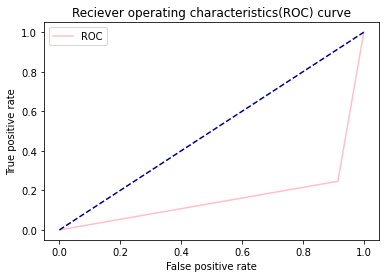

In [228]:
plt.plot(fpr,tpr,color='pink',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Reciever operating characteristics(ROC) curve')
plt.legend()
plt.show()

# AUC score

In [229]:
auc_score=roc_auc_score(y_test,y_pred)
print(auc_score*100)

83.44309354947652


# Classification Report

In [230]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.75      0.82       126
           1       0.81      0.91      0.86       141

    accuracy                           0.84       267
   macro avg       0.85      0.83      0.84       267
weighted avg       0.84      0.84      0.84       267



# Saving the model in pickel format

In [232]:
import joblib
joblib.dump(accuracy_score(y_test, y_pred)*100,"Claim.pk1")

['Claim.pk1']

# Testing Model with Future Data for output

In [233]:
X1.iloc[0]

0   -0.378069
1   -1.278652
2   -1.250253
3    3.653877
4   -0.173989
5   -0.135271
6    1.570437
7    0.037374
8    0.474974
9    0.836077
Name: 0, dtype: float64

In [234]:
y.iloc[0]

1

we will take exist data as sample data to compare predict output

In [235]:
t=np.array([-0.378069,-1.278652,-1.250253,3.653877,-0.173989,-0.135271,1.570437,0.037374,0.474974,0.836077])

In [236]:
t.shape

(10,)

In [237]:
x_train.shape

(1213, 10)

In [238]:
t=t.reshape(1,-1)
t.shape

(1, 10)

In [239]:
Output1.predict(t)

array([1])

we can see the actual and predicted data is matching hence model is predicting Good